In [6]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
import warnings

In [7]:
train = pd.read_csv("train")
test = pd.read_csv("test")
X_train = train[[ 'Quota', 'Seat Type','Institute' , 'Gender','Year','Duration','Round','Opening','Closing', "Avg_ranking"]]
X_test = test[[ 'Quota', 'Seat Type','Institute' , 'Gender','Year','Duration','Round','Opening','Closing' ,"Avg_ranking"]]
Y_train = train[["Institute" , 'Degree' , 'Branch']]
Y_test = test[["Institute" , 'Degree', 'Branch']]

In [8]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    acuracy = r2_square*100
    return mae, rmse, r2_square,acuracy

In [9]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)  



DecisionTreeRegressor()

In [10]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
model_train_mae , model_train_rmse, model_train_r2 ,model_train_acuracy = evaluate_model(Y_train, Y_train_pred)
model_test_mae , model_test_rmse, model_test_r2, model_test_acuracy = evaluate_model(Y_test, Y_test_pred)
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))
print("- Acuracy Score: {:.4f}".format(model_train_acuracy))
print('*********************************')
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))
print("- Acuracy Score: {:.4f}".format(model_test_acuracy)) 

Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
- Acuracy Score: 100.0000
*********************************
Model performance for Test set
- Root Mean Squared Error: 17.0389
- Mean Absolute Error: 7.3140
- R2 Score: 0.2337
- Acuracy Score: 23.3735


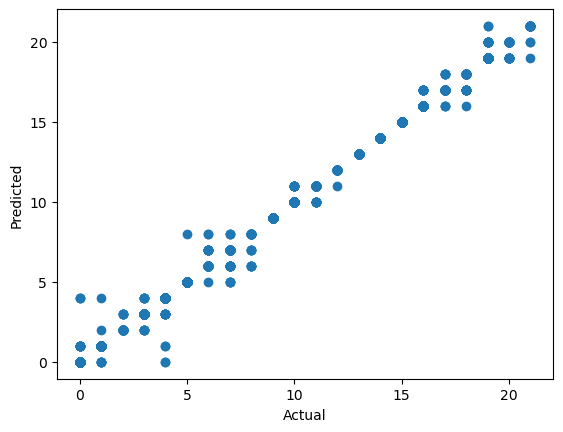

In [11]:
plt.scatter(Y_test["Institute"],Y_test_pred[:,0]);
plt.xlabel('Actual');
plt.ylabel('Predicted');

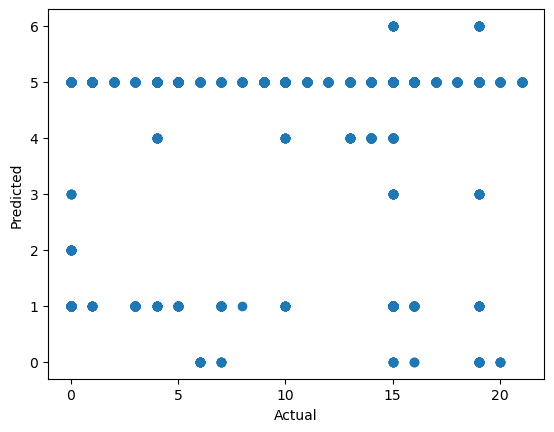

In [12]:
plt.scatter(Y_test["Institute"],Y_test_pred[:,1]);
plt.xlabel('Actual');
plt.ylabel('Predicted');

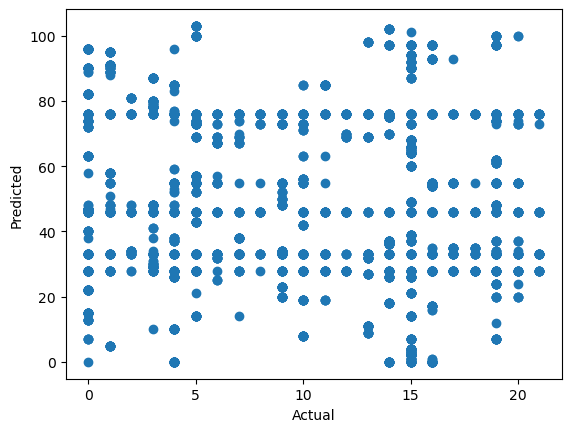

In [13]:
plt.scatter(Y_test["Institute"],Y_test_pred[:,2]);
plt.xlabel('Actual');
plt.ylabel('Predicted');

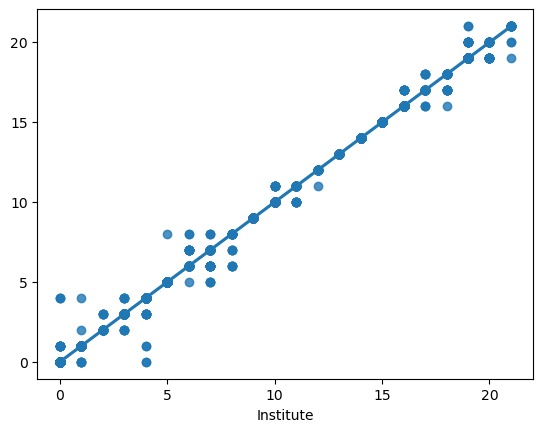

In [14]:
sns.regplot(x=Y_test["Institute"],y=Y_test_pred[:,0],ci=None);

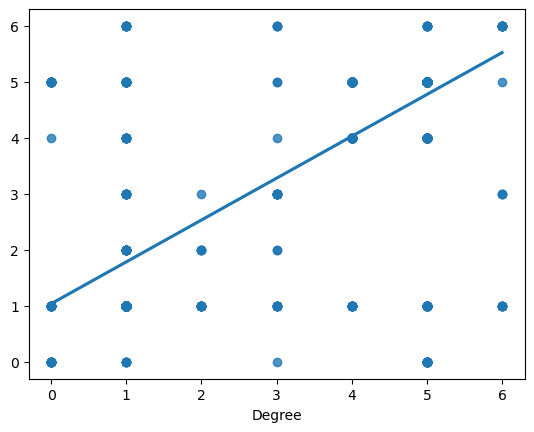

In [15]:
sns.regplot(x=Y_test["Degree"],y=Y_test_pred[:,1],ci=None);

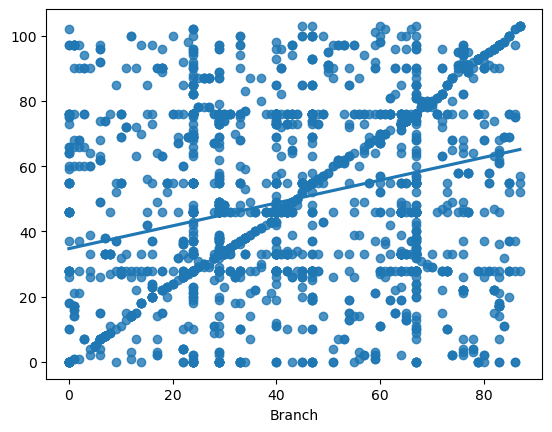

In [16]:
sns.regplot(x=Y_test["Branch"],y=Y_test_pred[:,2],ci=None);